**Данные**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
df = pd.read_csv("https://raw.githubusercontent.com/dm-fedorov/python_basic/master/data/vkontakte_group_01_2016-08-01_2020-03-15.csv")
dfcr = pd.get_dummies(df, columns=['Критерий'])
def to_datetime(row):
    return datetime.strptime(row['Дата'], '%d.%m.%Y')

**Задание 1**

определить статистику посещаемости группы (просмотры/посещения в год)

In [2]:
views = dfcr[['Дата', 'Значение']][dfcr['Критерий_views'] == 1]
views['Дата'] = views.apply(to_datetime, axis=1).dt.strftime('%Y')
views_of_year = views.groupby(['Дата'])['Значение'].sum()
views_of_year

Дата
2016     7199
2017    11872
2018     7055
2019     8754
2020     1444
Name: Значение, dtype: int64

**Задание 2**

провести анализ охвата аудитории (reach/reach_subscribers)

In [3]:
import pylab
aud_coverage = dfcr[['Дата','Значение']][dfcr['Критерий_reach'] == 1]
aud_coverage['Дата'] = aud_coverage.apply(to_datetime, axis=1).dt.strftime('%Y-%m')
aud_coverageM = aud_coverage.groupby(['Дата'])['Значение'].sum()

In [4]:
follower_coverage = dfcr[['Дата','Значение']][dfcr['Критерий_reach_subscribers'] == 1]
follower_coverage['Дата'] = follower_coverage.apply(to_datetime, axis=1).dt.strftime('%Y-%m')
follower_coverageM = follower_coverage.groupby(['Дата'])['Значение'].sum()

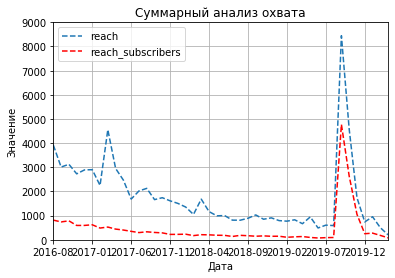

In [5]:
plt.title('Суммарный анализ охвата')
plt.xlabel('Дата')
plt.ylabel('Значение')
aud_coverageM.plot(label="reach", linestyle='--')
follower_coverageM.plot(label = "reach_subscribers", linestyle='--',color = 'red')
pylab.ylim(0, 9000)
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

**Задание 3**

провести анализ демографии (пол - gender, возраст аудитории - age, gender_age, страна - countries)

In [6]:
ex_gender = dfcr[['Дата', 'Значение','Парам. №1']][dfcr['Критерий_gender'] == 1]
gender_division = ex_gender.groupby(['Парам. №1'])['Значение'].sum()
gender_division

Парам. №1
Ж    10063
М    12637
Name: Значение, dtype: int64

In [7]:
ex_age = dfcr[['Парам. №1', 'Значение']][dfcr['Критерий_age'] == 1]
age_division = ex_age.groupby(['Парам. №1'])['Значение'].sum()
age_division

Парам. №1
1-18      741
18-21    3046
21-24    2560
24-27    1751
27-30    2419
30-35    3466
35-45    2402
45+      2350
Name: Значение, dtype: int64

In [8]:
ex_country = dfcr[['Парам. №1','Значение']][dfcr['Критерий_countries'] == 1]
country_division = ex_country.groupby(['Парам. №1'])['Значение'].sum()
country_division

Парам. №1
Австралия                       1
Австрия                         7
Азербайджан                    19
Аргентина                       1
Армения                         8
                               ..
Шри-Ланка                       1
Эстония                        28
Южная Корея                     3
Южно-Африканская Республика     1
Япония                          2
Name: Значение, Length: 70, dtype: int64

**Задание 4**

провести анализ обратной связи

In [9]:
feedback = dfcr[['Дата','Парам. №1','Значение']][dfcr['Критерий_feedback'] == 1]
feedback['Дата'] = feedback.apply(to_datetime, axis=1).dt.strftime('%Y-%m')
print(feedback['Парам. №1'].value_counts())

Нравится              683
Рассказали друзьям    291
Комментарии            91
Упоминания              1
Name: Парам. №1, dtype: int64


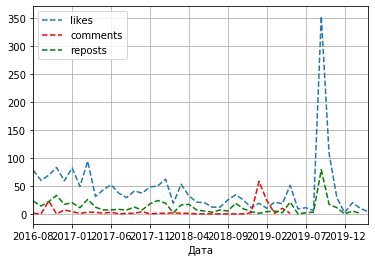

In [10]:
like_s = feedback[feedback['Парам. №1'] == 'Нравится'].groupby(['Дата'])['Значение'].sum().plot(label="likes", linestyle='--')
comment_s = feedback[feedback['Парам. №1'] == 'Комментарии'].groupby(['Дата'])['Значение'].sum().plot(label="comments", linestyle='--',color = 'red')
repost_s = feedback[feedback['Парам. №1'] == 'Рассказали друзьям'].groupby(['Дата'])['Значение'].sum().plot(label="reposts", linestyle='--',color = 'green')
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

**Задание 5**

обосновать, подходит ли данная группа для продвижения нового товара среди активных пользователей из России моложе 30 лет?

In [11]:
print('Наиболее популярна группа для людей в возрасте: ', str(age_division.sort_values(ascending=False).index[0]), 'лет и',  str(age_division.sort_values(ascending=False).index[1]), 'лет')
print('Наиболее популярна группа для людей, проживающих в: ', str(country_division.sort_values(ascending=False).index[0]))

Наиболее популярна группа для людей в возрасте:  30-35 лет и 18-21 лет
Наиболее популярна группа для людей, проживающих в:  Россия


Анализ показал, что по возрастному и демографическому показателям группа польхуется популярностью среди активных пользователей из России моложе 30 лет, что позволяет нам сделать вывод, что она подходит для продвижения нового товара